<a href="https://colab.research.google.com/github/Christi049/AQI_prediction_model/blob/main/AQI_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd

df = pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [55]:
df = df.dropna(subset=["AQI"])
df["Date"] = pd.to_datetime(df["Date"])

In [56]:
#testing for variabilty
for city in df['City'].unique():
    city_df = df[df['City'] == city].copy()
    city_df['Date'] = pd.to_datetime(city_df['Date'])
    monthly_aqi = city_df.set_index('Date')['AQI'].resample('M').mean()
    print(city, monthly_aqi.describe())

/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.set_index('Date')['AQI'].resample('M').mean()
/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.set_index('Date')['AQI'].resample('M').mean()
/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.set_index('Date')['AQI'].resample('M').mean()
/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.set_index('Date')['AQI'].resample('M').mean()
/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.s

Ahmedabad count     51.000000
mean     440.964948
std      203.563155
min       97.357143
25%      293.829749
50%      430.500000
75%      559.082672
max      955.366667
Name: AQI, dtype: float64
Aizawl count     5.000000
mean     33.927790
std      19.202578
min      20.000000
25%      20.862069
50%      24.193548
75%      39.233333
max      65.350000
Name: AQI, dtype: float64
Amaravati count     32.000000
mean      95.262653
std       46.978700
min       44.400000
25%       58.010081
50%       80.453846
75%      112.852914
max      218.612903
Name: AQI, dtype: float64
Amritsar count     42.000000
mean     119.192625
std       57.517644
min       52.000000
25%       80.808333
50%      105.568182
75%      135.859020
max      319.076923
Name: AQI, dtype: float64
Bengaluru count     65.000000
mean      93.764192
std       24.684528
min       43.000000
25%       72.966667
50%       92.965517
75%      110.700000
max      160.548387
Name: AQI, dtype: float64
Bhopal count     11.000000
mean 

/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.set_index('Date')['AQI'].resample('M').mean()
/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.set_index('Date')['AQI'].resample('M').mean()
/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.set_index('Date')['AQI'].resample('M').mean()
/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.set_index('Date')['AQI'].resample('M').mean()
/tmp/ipython-input-308/4245204766.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df.s

In [3]:
df["Month"] = df["Date"].dt.to_period("M")
monthly = df.groupby(["City", "Month"])["AQI"].mean().reset_index()

In [4]:
monthly.to_csv("cleaned_aqi.csv", index=False)

In [5]:
top5 = df.groupby("City")["AQI"].mean().sort_values(ascending=False).head(5)

print(top5)

City
Ahmedabad    452.122939
Delhi        259.487744
Patna        240.782042
Gurugram     225.123882
Lucknow      217.973059
Name: AQI, dtype: float64


In [6]:
top5_cities = top5.index.tolist()
print(top5_cities)

['Ahmedabad', 'Delhi', 'Patna', 'Gurugram', 'Lucknow']


In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def train_sarima_for_city(city_name, df):
    # Filter city
    city_df = df[df["City"] == city_name].copy()
    city_df = city_df.sort_values("Date")
    city_df.set_index("Date", inplace=True)
    city_df.index = pd.to_datetime(city_df.index)

    # Fill missing daily AQI
    city_df = city_df.asfreq('D')
    city_df["AQI"] = city_df["AQI"].interpolate()

    # Convert to monthly averages
    monthly_aqi = city_df["AQI"].resample("M").mean()

    # Optional: check stationarity
    result = adfuller(monthly_aqi.dropna())
    print(f"{city_name} ADF p-value:", result[1])

    # Train SARIMA
    model = SARIMAX(monthly_aqi,
                    order=(3,1,2),
                    seasonal_order=(2,1,2,12))
    model_fit = model.fit(disp=False)

    # Forecast 12 months
    forecast = model_fit.forecast(steps=12)
    forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')

    forecast_df = pd.DataFrame({
        "Date": forecast_dates,
        "Predicted_AQI": forecast.values,
        "City": city_name
    })

    return monthly_aqi, forecast_df

In [41]:
print(df.columns)

Index(['Date', 'Predicted_AQI', 'City'], dtype='object')


In [59]:
from google.colab import files
all_forecasts = []

for city in df["City"].unique():
    _, forecast_df = train_sarima_for_city(city, df)
    all_forecasts.append(forecast_df)

final_forecast = pd.concat(all_forecasts, ignore_index=True)
final_forecast.to_json("forecast.json", orient="records")
files.download("forecast.json")

/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Ahmedabad ADF p-value: 0.026733570828550744


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()


Aizawl ADF p-value: 5.174596855941768e-15
Amaravati ADF p-value: 0.006474933615634782


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQ

Amritsar ADF p-value: 0.01745007687632837


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserW

Bengaluru ADF p-value: 0.009972996533874805


/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate

Bhopal ADF p-value: 0.6651830561091303
Brajrajnagar ADF p-value: 1.6592708132583455e-05


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/stat

Chandigarh ADF p-value: 1.247521664673009e-07
Chennai ADF p-value: 2.894742864679556e-14


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/stat

Coimbatore ADF p-value: 0.8490881640631376


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Delhi ADF p-value: 0.9736669573897997


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/stat

Ernakulam ADF p-value: 0.7222672318855599
Gurugram ADF p-value: 0.00017723003635784033


/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packa

Guwahati ADF p-value: 0.03794667581298568


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserW

Hyderabad ADF p-value: 0.5018570557671888


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Jaipur ADF p-value: 0.01592976407945467


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserW

Jorapokhar ADF p-value: 0.012501890966304377


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/stat

Kochi ADF p-value: 0.1750628511766315
Kolkata ADF p-value: 0.8140685377915016


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Lucknow ADF p-value: 0.9987393438749036


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few o

Mumbai ADF p-value: 0.7701329626925277


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserW

Patna ADF p-value: 0.9694164303355044


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/stat

Shillong ADF p-value: 0.8117415493849598
Talcher ADF p-value: 0.009051228052369594


/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:8

Thiruvananthapuram ADF p-value: 0.9857963410916472


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
/tmp/ipython-input-308/4172666751.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserW

Visakhapatnam ADF p-value: 0.003521804527592803


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-308/4172666751.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_aqi.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
import pandas as pd
from google.colab import files

all_monthly_data = []

for city in top5_cities:
    city_df = df[df["City"] == city].copy()
    city_df = city_df.sort_values("Date")

    # Ensure datetime
    city_df["Date"] = pd.to_datetime(city_df["Date"])
    city_df.set_index("Date", inplace=True)

    # Fill missing daily data
    city_df = city_df.asfreq('D')
    city_df["AQI"] = city_df["AQI"].interpolate()

    # Monthly average
    monthly_aqi = city_df["AQI"].resample("M").mean()

    # Prepare DataFrame in consistent format
    temp_df = monthly_aqi.reset_index()
    temp_df.columns = ["Date", "AQI"]  # now called AQI, not Predicted_AQI
    temp_df["City"] = city

    all_monthly_data.append(temp_df)

# Combine all cities
historical_data = pd.concat(all_monthly_data, ignore_index=True)

# Export to JSON
historical_data.to_json("historical.json", orient="records", date_format="iso")

# Download
files.download("historical.json")

/tmp/ipython-input-308/2580393159.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/tmp/ipython-input-308/2580393159.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/tmp/ipython-input-308/2580393159.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/tmp/ipython-input-308/2580393159.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()
/tmp/ipython-input-308/2580393159.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df["AQI"].resample("M").mean()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

VALIDATING MODEL

In [13]:
train_size = int(len(monthly_aqi) * 0.8)

train = monthly_aqi[:train_size]
test = monthly_aqi[train_size:]

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train,
    order=(3,1,2),
    seasonal_order=(2,1,2,12)  # 12 = yearly seasonality
)

model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
forecast_test = model_fit.forecast(steps=len(test))

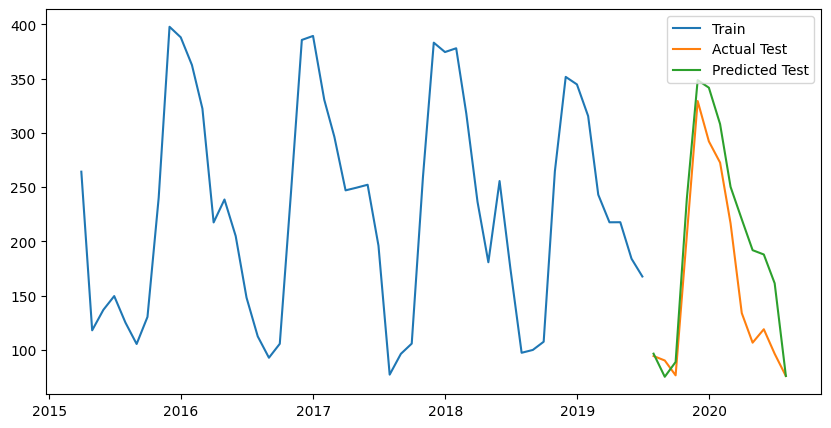

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Actual Test")
plt.plot(forecast_test, label="Predicted Test")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast_test)
rmse = np.sqrt(mean_squared_error(test, forecast_test))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 38.98263193825015
RMSE: 48.37865525490674


In [34]:
from google.colab import files
import pandas as pd

# Convert CSV to JSON
df = pd.read_csv("top5_aqi_forecast.csv")
df.to_json("top5_aqi_forecast.json", orient="records")

# Download to local system
files.download("top5_aqi_forecast.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
import pandas as pd

df = pd.read_csv("top5_aqi_forecast.csv")
print(df.head(20))      # Check first 20 rows
print(df.groupby('City')['Predicted_AQI'].mean())

          Date  Predicted_AQI       City
0   2019-07-31      96.594458  Ahmedabad
1   2019-08-31      75.309630  Ahmedabad
2   2019-09-30      88.964036  Ahmedabad
3   2019-10-31     239.287689  Ahmedabad
4   2019-11-30     348.640313  Ahmedabad
5   2019-12-31     341.646527  Ahmedabad
6   2020-01-31     308.136448  Ahmedabad
7   2020-02-29     250.283738  Ahmedabad
8   2020-03-31     220.394315  Ahmedabad
9   2020-04-30     191.945619  Ahmedabad
10  2020-05-31     187.972116  Ahmedabad
11  2020-06-30     161.449960  Ahmedabad
12  2019-07-31      96.594458      Delhi
13  2019-08-31      75.309630      Delhi
14  2019-09-30      88.964036      Delhi
15  2019-10-31     239.287689      Delhi
16  2019-11-30     348.640313      Delhi
17  2019-12-31     341.646527      Delhi
18  2020-01-31     308.136448      Delhi
19  2020-02-29     250.283738      Delhi
City
Ahmedabad    209.218737
Delhi        209.218737
Gurugram     209.218737
Lucknow      209.218737
Patna        209.218737
Name: Predicte